In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [2]:
df_all = pd.read_csv('fanfic_regression_data_curated.tsv', sep = '\t')

In [3]:
len(df_all)

701667

In [4]:
df_all['ChapterIndex'].fillna(0, inplace=True)

In [5]:
df_all.head(2)

,Bookmarks,ChapterIndex,Chapters,Comments,Hits,Kudos,Term_novelty,Topic_novelty,Freq_relationship,Category_F_F,...,Fandom_shakespare,Fandom_hetalia,Fandom_attack_on_titan,Fandom_ms_paint_adventures,Fandom_homestuck,Fandom_marvel,Fandom_sailor_moon,Fandom_one_direction,Fandom_sherlock,History
0,2,1.0,3,0,320.0,8.0,0.778655,0.599456,0,0,...,0,0,0,0,0,0,0,0,0,5136.0
1,0,0.0,1,0,25.0,1.0,0.713975,0.605999,0,0,...,0,0,0,0,0,0,0,0,0,5589.0


### Logistic

In [272]:
def run_logit(df, field):
    df['Intercept'] = 1.0
    df['binary'] = df[field].apply(lambda x: 1 if x != 0.0 else 0)
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna(how = 'any')
    logit_model = sm.Logit(df['binary'], df_all[['Chapters',\
        'Term_novelty', 'Topic_novelty', \
        'Freq_relationship', 'Category_F_M',\
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other','Category_Unknown', \
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',\
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_no_apply',\
       'ArchiveWarnings_violence',\
       'ArchiveWarnings_noncon', 'author_fic_cnt', 'Rating_G',\
       'Rating_M', 'Rating_N', 'Rating_T',\
       'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_adventures', 'Fandom_homestuck', 'Fandom_marvel',
       'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
       'History', 'Intercept']]).fit(method='bfgs')
    pred = logit_model.predict()
    df['nonzero_prob'] = pred
    return df

### OLS

In [276]:
def run_ols(df, field):
    df = run_logit(df, field)
    df_log = df.copy()
    df_log['Kudos'] = np.log(df_log['Kudos']+0.001)
    df_log['Hits'] = np.log(df_log['Hits']+0.001)
    df_log['Comments'] = np.log(df_log['Comments']+1)
    df_log['Bookmarks'] = np.log(df_log['Bookmarks']+0.001)
    df_log = df_log.replace([np.inf, -np.inf], np.nan)
    df_log = df_log.dropna(how = 'any')
    model = ols( field + " ~ Term_novelty + Topic_novelty \
 + Chapters + Freq_relationship + author_fic_cnt + History\
 + Category_Gen + Category_F_M + Category_M_M + Category_Multi + Category_Other + Category_Unknown \
 + ArchiveWarnings_underage + ArchiveWarnings_death + ArchiveWarnings_violence +\
 ArchiveWarnings_noncon + ArchiveWarnings_choose_no +\
 ArchiveWarnings_no_apply + Rating_N + Rating_E + Rating_M + Rating_T\
 + Fandom_dcu + Fandom_doctor_who + Fandom_star_wars + Fandom_arthurian + \
 Fandom_supernatural + Fandom_haikyuu + Fandom_kuroko_no_basuke + Fandom_hamilton_miranda\
 + Fandom_dragon_age + Fandom_the_walking_dead + Fandom_buffy + Fandom_les_miserables \
 + Fandom_naruto + Fandom_tolkien + Fandom_shakespare + Fandom_hetalia + \
 Fandom_attack_on_titan + Fandom_ms_paint_adventures + Fandom_homestuck +\
 Fandom_marvel + Fandom_sailor_moon + Fandom_one_direction + Fandom_sherlock \
 + nonzero_prob", data = df_log).fit()
    return model

### Plot coefficients

In [277]:
model = run_ols(df_all, 'Kudos')

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:

         Current function value: 0.076216
         Iterations: 35
         Function evaluations: 75
         Gradient evaluations: 57


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [278]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Kudos   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     5675.
Date:                Thu, 19 Jul 2018   Prob (F-statistic):               0.00
Time:                        14:41:31   Log-Likelihood:            -1.3928e+06
No. Observations:              701667   AIC:                         2.786e+06
Df Residuals:                  701621   BIC:                         2.786e+06
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [215]:
ylabels =['Term novelty ',' Topic novelty' , 'Chapters', \
 'Frequent relationship',' Author work count','Age',\
 'Category (Gen)','Category (F/M)',' Category (M/M) ',' Category (Multi)','Category (Other)','Category (Unknown)\
 ','ArchiveWarnings (underage)','ArchiveWarnings (death)',' ArchiveWarnings (violence)','\
 ArchiveWarnings (non-consensual)','ArchiveWarnings (choose not to use)','\
 ArchiveWarnings (no warinigs apply)','Rating (Not rated)', 'Rating (Explicit)','Rating (Mature)',' Rating (Teens)\
 ',' Fandom (DCU) ',' Fandom (Doctor Who) ',' Fandom (Star Wars) ',' Fandom (Arthurian Mythologies)',\
  'Fandom (Supernatural)','Fandom (Haikyuu)',' Fandom (Kuroko no Basuke)',' Fandom (Hamilton/Miranda)\
 ',' Fandom (Dragon Age)',' Fandom (The Walking Dead)',' Fandom (Buffy the Vampire Slayer)','Fandom (Les Miserables)\
 ',' Fandom (Naruto)','Fandom (Tolkien)',' Fandom (Shakespare)','Fandom (Axis Powers Hetalia)',' \
 Fandom (Attack on Titan)',' Fandom (Ms Paint Adventures)',' Fandom (Homestuck)','\

Fandom (Marvel)',' Fandom (Sailor Moon)',' Fandom (One Direction)','Fandom (Sherlock)'][::-1]

In [280]:
kudos_model = run_ols(df_all, 'Kudos')
kudos_coef = list(kudos_model.params)[1:-1][::-1]
kudos_err = list(kudos_model.bse)[1:-1]

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:

         Current function value: 0.076216
         Iterations: 35
         Function evaluations: 75
         Gradient evaluations: 57


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [281]:
hits_model = run_ols(df_all, 'Hits')
hits_coef = list(hits_model.params)[1:-1][::-1]
hits_err = list(hits_model.bse)[1:-1]

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:

         Current function value: 0.179552
         Iterations: 3
         Function evaluations: 43
         Gradient evaluations: 21


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [282]:
comments_model = run_ols(df_all, 'Comments')
comments_coef = list(comments_model.params)[1:-1][::-1]
comments_err = list(comments_model.bse)[1:-1]

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 4


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [283]:
bookmarks_model = run_ols(df_all, 'Bookmarks')
bookmarks_coef = list(bookmarks_model.params)[1:-1][::-1]
bookmarks_err = list(bookmarks_model.bse)[1:-1]

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.424771
         Iterations: 35
         Function evaluations: 50
         Gradient evaluations: 43


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [286]:
bookmarks_model.params

Intercept                     -5.387336
Term_novelty                   0.155338
Topic_novelty                 -4.743090
Chapters                       0.007778
Freq_relationship              0.071842
author_fic_cnt                -0.000010
History                       -0.000098
Category_Gen                   0.136977
Category_F_M                  -0.086804
Category_M_M                   0.041687
Category_Multi                -0.014151
Category_Other                 0.074570
Category_Unknown               0.226271
ArchiveWarnings_underage      -0.116358
ArchiveWarnings_death         -0.161652
ArchiveWarnings_violence      -0.200943
ArchiveWarnings_noncon        -0.092606
ArchiveWarnings_choose_no     -0.138275
ArchiveWarnings_no_apply      -0.200079
Rating_N                       0.049029
Rating_E                       0.583998
Rating_M                       0.161774
Rating_T                       0.075233
Fandom_dcu                    -0.251307
Fandom_doctor_who             -0.251307


In [284]:
bookmarks_coef

[-0.3466617341381244,
 -0.3593288000497,
 -2.382806610413433,
 -0.18974757561239894,
 -0.58931325305669,
 -0.5619155180670337,
 -0.28917071722710347,
 -0.4586926096479146,
 -1.6372755570357203,
 -0.13111127440230355,
 -0.42506628749590897,
 -0.5875961972584186,
 -0.23111021675666893,
 -0.49992751583429007,
 -0.38287638912623606,
 0.22669666424505774,
 -0.12980118885950667,
 -0.05755029744719783,
 -0.46000066988425187,
 -0.39552724527520494,
 -0.27098813082235385,
 -0.25130676138275343,
 -0.2513067613827849,
 0.07523264029442177,
 0.16177435788370303,
 0.5839981201293563,
 0.04902890583078441,
 -0.20007909993936393,
 -0.13827452334607243,
 -0.09260605937670058,
 -0.20094309427676615,
 -0.16165151492233665,
 -0.11635802372254654,
 0.22627104392662617,
 0.07457048761909327,
 -0.01415104041223566,
 0.041686585791970814,
 -0.08680441219187122,
 0.13697723831174788,
 -9.761797235084831e-05,
 -1.0469645480182858e-05,
 0.07184209460394277,
 0.00777753269776058,
 -4.743090334247132,
 0.15533777

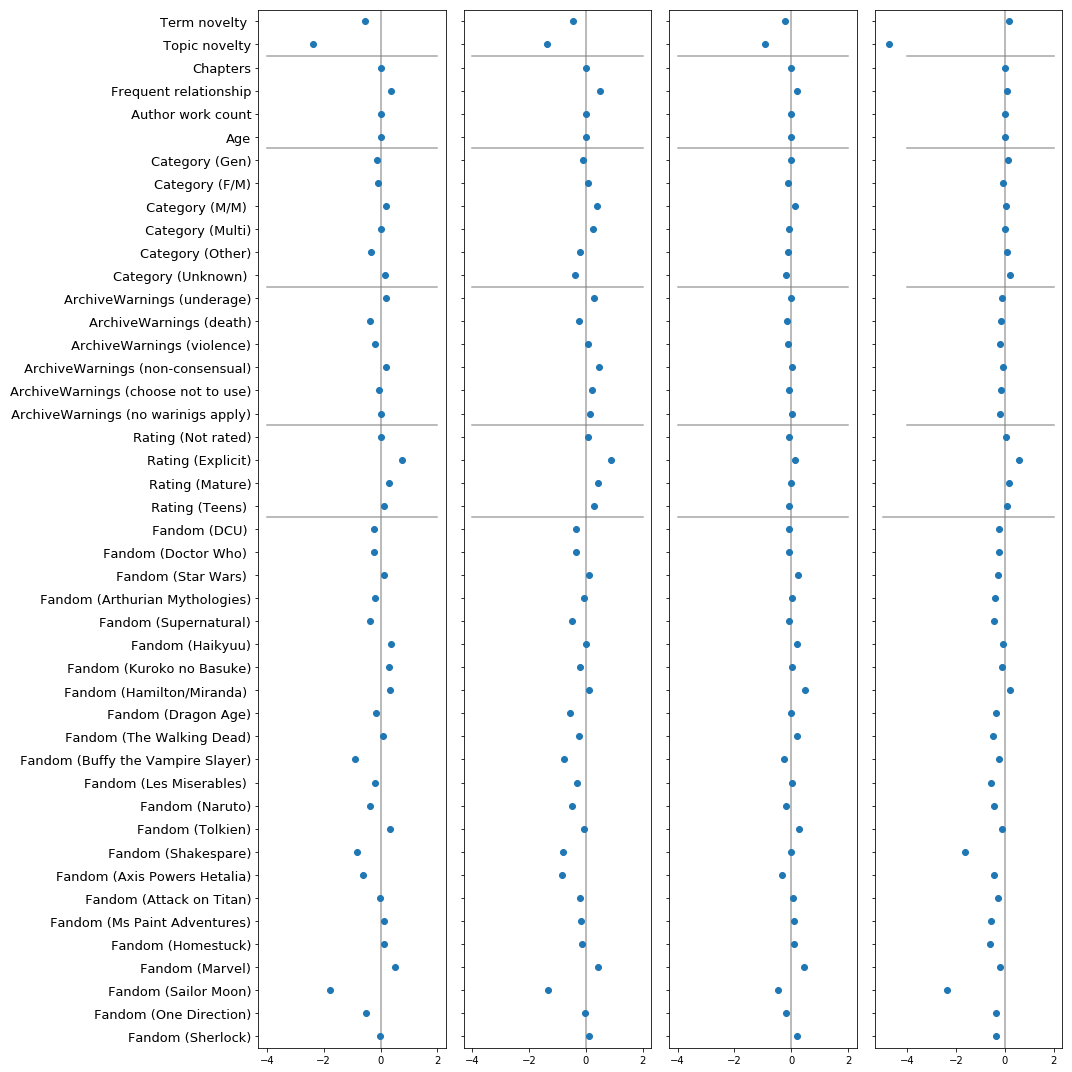

In [290]:
fig, ax = plt.subplots(1,4,figsize = (15,15))
ax[0].errorbar(kudos_coef, range(len(kudos_coef)), xerr=kudos_err, fmt='o')
ax[0].set_yticks(range(len(kudos_coef)))
ax[0].set_yticklabels(ylabels)
ax[0].plot([0 for i in range(len(kudos_coef)+2)], range(-1,len(kudos_coef)+1), c='grey', alpha = 0.7)
ax[0].plot(range(-4,3), [22.5 for i in range(-4,3)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-4,3), [26.5 for i in range(-4,3)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-4,3), [32.5 for i in range(-4,3)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-4,3), [38.5 for i in range(-4,3)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-4,3), [42.5 for i in range(-4,3)] ,c='grey', alpha = 0.7)
ax[0].set_ylim(-0.5,44.5)
# ax[0].set_xlim(-3,1.5)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(13)

ax[1].errorbar(hits_coef, range(len(hits_coef)), xerr=hits_err, fmt='o')
ax[1].set_yticks(range(len(hits_coef)))
# ax[1].set_yticklabels(ylabels)
ax[1].plot([0 for i in range(len(hits_coef)+2)], range(-1,len(hits_coef)+1), c='grey', alpha = 0.7)
ax[1].plot(range(-4,3), [22.5 for i in range(-4,3)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-4,3), [26.5 for i in range(-4,3)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-4,3), [32.5 for i in range(-4,3)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-4,3), [38.5 for i in range(-4,3)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-4,3), [42.5 for i in range(-4,3)] ,c='grey', alpha = 0.7)
ax[1].set_ylim(-0.5,44.5)
# ax[1].set_xlim(-3,1.5)
ax[1].set_yticklabels([])

ax[2].errorbar(comments_coef, range(len(comments_coef)), xerr=comments_err, fmt='o')
ax[2].set_yticks(range(len(comments_coef)))
ax[2].plot([0 for i in range(len(comments_coef)+2)], range(-1,len(comments_coef)+1), c='grey', alpha = 0.7)
ax[2].plot(range(-4,3), [22.5 for i in range(-4,3)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-4,3), [26.5 for i in range(-4,3)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-4,3), [32.5 for i in range(-4,3)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-4,3), [38.5 for i in range(-4,3)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-4,3), [42.5 for i in range(-4,3)] ,c='grey', alpha = 0.7)
ax[2].set_ylim(-0.5,44.5)
# ax[2].set_xlim(-3,1.5)
ax[2].set_yticklabels([])

ax[3].errorbar(bookmarks_coef, range(len(bookmarks_coef)), xerr=bookmarks_err, fmt='o')
ax[3].set_yticks(range(len(bookmarks_coef)))
ax[3].plot([0 for i in range(len(bookmarks_coef)+2)], range(-1,len(bookmarks_coef)+1), c='grey', alpha = 0.7)
ax[3].plot(range(-5,3), [22.5 for i in range(-5,3)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-4,3), [26.5 for i in range(-4,3)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-4,3), [32.5 for i in range(-4,3)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-4,3), [38.5 for i in range(-4,3)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-4,3), [42.5 for i in range(-4,3)] ,c='grey', alpha = 0.7)
ax[3].set_ylim(-0.5,44.5)
# ax[3].set_xlim(-3,1.5)
ax[3].set_yticklabels([])

plt.tight_layout()
plt.savefig('ols_coefs.pdf', format='pdf')